In [183]:
import numpy as np
import pandas as pd
import warnings

In [184]:
#if we get any warning we will ignore them with
warnings.filterwarnings('ignore')

## Reading the Data from data set

In [185]:
columns_name=["user_id","item_id","rating","timestamp"]
df =pd.read_csv("ml-100k/u.data", sep='\t', names=columns_name)
df.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [186]:
df.shape

(100000, 4)

In [187]:
df['user_id'].nunique() #total unique id's

943

In [188]:
df['item_id'].nunique() #total unique movies

1682

In [189]:
movies_titles =pd.read_csv("ml-100k/u.item", sep='\|', header=None)

In [190]:
movies_titles=movies_titles[[0,1]]
movies_titles.columns = ['item_id', 'title']
movies_titles.head()

item_id              title
0        1   Toy Story (1995)
1        2   GoldenEye (1995)
2        3  Four Rooms (1995)
3        4  Get Shorty (1995)
4        5     Copycat (1995)

In [191]:
# now creating the single data frame by merging the df and movies_title
# df=pd.merge(df, movies_titles, on="item_id")
df= pd.merge(df, movies_titles, on="item_id")

df.tail()

user_id  item_id  rating  timestamp  \
99995      840     1674       4  891211682   
99996      655     1640       3  888474646   
99997      655     1637       3  888984255   
99998      655     1630       3  887428735   
99999      655     1641       3  887427810   

                                                   title  
99995                                  Mamma Roma (1962)  
99996                             Eighth Day, The (1996)  
99997                                  Girls Town (1996)  
99998  Silence of the Palace, The (Saimt el Qusur) (1...  
99999                                    Dadetown (1995)

## Exploratory Data Analysis

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [193]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [194]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Name: rating, Length: 1664, dtype: int64

In [195]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [196]:
ratings.head()

rating
title                              
'Til There Was You (1997)  2.333333
1-900 (1994)               2.600000
101 Dalmatians (1996)      2.908257
12 Angry Men (1957)        4.344000
187 (1997)                 3.024390

In [197]:
ratings['num of ratings']=pd.DataFrame(df.groupby('title').count()['rating'])

In [198]:
ratings.head()

rating  num of ratings
title                                              
'Til There Was You (1997)  2.333333               9
1-900 (1994)               2.600000               5
101 Dalmatians (1996)      2.908257             109
12 Angry Men (1957)        4.344000             125
187 (1997)                 3.024390              41

In [199]:
ratings.sort_values(by='rating', ascending=False)

rating  num of ratings
title                                                               
They Made Me a Criminal (1939)                   5.0               1
Marlene Dietrich: Shadow and Light (1996)        5.0               1
Saint of Fort Washington, The (1993)             5.0               2
Someone Else's America (1995)                    5.0               1
Star Kid (1997)                                  5.0               3
...                                              ...             ...
Eye of Vichy, The (Oeil de Vichy, L') (1993)     1.0               1
King of New York (1990)                          1.0               1
Touki Bouki (Journey of the Hyena) (1973)        1.0               1
Bloody Child, The (1996)                         1.0               1
Crude Oasis, The (1995)                          1.0               1

[1664 rows x 2 columns]

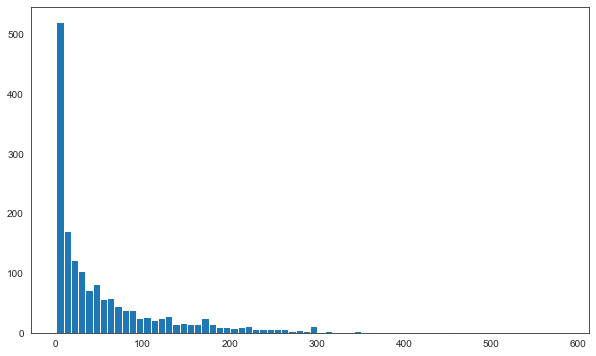

In [200]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num of ratings'], bins = 70)
plt.show()

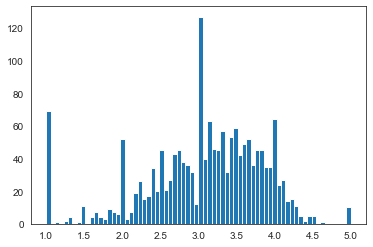

In [201]:
plt.hist(ratings['rating'],bins=70)
plt.show()

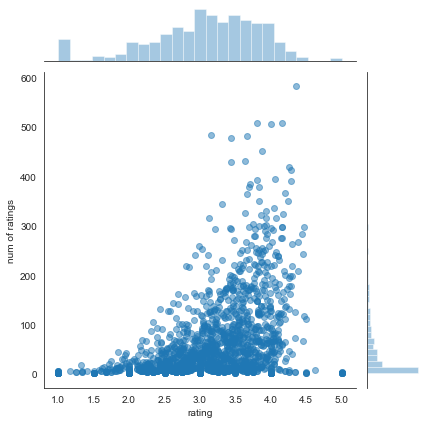

In [202]:
sns.jointplot(x='rating' ,y='num of ratings', data=ratings, alpha=0.5)

## Movie Recommendation 

In [203]:
df.head()

user_id  item_id  rating  timestamp         title
0      196      242       3  881250949  Kolya (1996)
1       63      242       3  875747190  Kolya (1996)
2      226      242       5  883888671  Kolya (1996)
3      154      242       3  879138235  Kolya (1996)
4      306      242       5  876503793  Kolya (1996)

In [204]:
moviemat=df.pivot_table(index="user_id", columns="title", values="rating")
moviemat.head()

title    'Til There Was You (1997)  1-900 (1994)  101 Dalmatians (1996)  \
user_id                                                                   
1                              NaN           NaN                    2.0   
2                              NaN           NaN                    NaN   
3                              NaN           NaN                    NaN   
4                              NaN           NaN                    NaN   
5                              NaN           NaN                    2.0   

title    12 Angry Men (1957)  187 (1997)  2 Days in the Valley (1996)  \
user_id                                                                 
1                        5.0         NaN                          NaN   
2                        NaN         NaN                          NaN   
3                        NaN         2.0                          NaN   
4                        NaN         NaN                          NaN   
5                        NaN         NaN                          NaN   

title    20,000 Leagues Under the Sea (1954)  2001: A Space Odyssey (1968)  \
user_id                                                                      
1                                        3.0                           4.0   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
5                                        NaN                           4.0   

title    3 Ninjas: High Noon At Mega Mountain (1998)  39 Steps, The (1935)  \
user_id                                                                      
1                                                NaN                   NaN   
2                                                1.0                   NaN   
3                                                NaN                   NaN   
4                                                NaN                   NaN   
5                                                NaN                   NaN   

title    ...  Yankee Zulu (1994)  Year of the Horse (1997)  \
user_id  ...                                                 
1        ...                 NaN                       NaN   
2        ...                 NaN                       NaN   
3        ...                 NaN                       NaN   
4        ...                 NaN                       NaN   
5        ...                 NaN                       NaN   

title    You So Crazy (1994)  Young Frankenstein (1974)  Young Guns (1988)  \
user_id                                                                      
1                        NaN                        5.0                3.0   
2                        NaN                        NaN                NaN   
3                        NaN                        NaN                NaN   
4                        NaN                        NaN                NaN   
5                        NaN                        4.0                NaN   

title    Young Guns II (1990)  Young Poisoner's Handbook, The (1995)  \
user_id                                                                
1                         NaN                                    NaN   
2                         NaN                                    NaN   
3                         NaN                                    NaN   
4                         NaN                                    NaN   
5                         NaN                                    NaN   

title    Zeus and Roxanne (1997)  unknown  Á köldum klaka (Cold Fever) (1994)  
user_id                                                                        
1                            NaN      4.0                                 NaN  
2                            NaN      NaN                                 NaN  
3                            NaN      NaN                    

In [205]:
ratings.sort_values('num of ratings', ascending=False).head()

rating  num of ratings
title                                              
Star Wars (1977)           4.358491             583
Contact (1997)             3.803536             509
Fargo (1996)               4.155512             508
Return of the Jedi (1983)  4.007890             507
Liar Liar (1997)           3.156701             485

In [206]:
starwars_user_ratings=moviemat['Star Wars (1977)']

In [207]:
starwars_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [208]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)
similar_to_starwars

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [209]:
corr_starwars=pd.DataFrame(similar_to_starwars, columns=['correlation'])
corr_starwars

correlation
title                                             
'Til There Was You (1997)                 0.872872
1-900 (1994)                             -0.645497
101 Dalmatians (1996)                     0.211132
12 Angry Men (1957)                       0.184289
187 (1997)                                0.027398
...                                            ...
Young Guns II (1990)                      0.228615
Young Poisoner's Handbook, The (1995)    -0.007374
Zeus and Roxanne (1997)                   0.818182
unknown                                   0.723123
Á köldum klaka (Cold Fever) (1994)             NaN

[1664 rows x 1 columns]

In [210]:
corr_starwars.dropna(inplace=True) ##removing NaN
corr_starwars.head()

correlation
title                                 
'Til There Was You (1997)     0.872872
1-900 (1994)                 -0.645497
101 Dalmatians (1996)         0.211132
12 Angry Men (1957)           0.184289
187 (1997)                    0.027398

In [211]:
corr_starwars.sort_values('correlation', ascending=False).head(10)

correlation
title                                                          
Hollow Reed (1996)                                          1.0
Commandments (1997)                                         1.0
Cosi (1996)                                                 1.0
No Escape (1994)                                            1.0
Stripes (1981)                                              1.0
Star Wars (1977)                                            1.0
Man of the Year (1995)                                      1.0
Beans of Egypt, Maine, The (1994)                           1.0
Old Lady Who Walked in the Sea, The (Vieille qu...          1.0
Outlaw, The (1943)                                          1.0

In [212]:
corr_starwars=corr_starwars.join(ratings['num of ratings'])
corr_starwars[corr_starwars['num of ratings']>100].sort_values('correlation', ascending=False)

correlation  \
title                                                             
Star Wars (1977)                                       1.000000   
Empire Strikes Back, The (1980)                        0.747981   
Return of the Jedi (1983)                              0.672556   
Raiders of the Lost Ark (1981)                         0.536117   
Austin Powers: International Man of Mystery (1997)     0.377433   
...                                                         ...   
Edge, The (1997)                                      -0.127167   
As Good As It Gets (1997)                             -0.130466   
Crash (1996)                                          -0.148507   
G.I. Jane (1997)                                      -0.176734   
First Wives Club, The (1996)                          -0.194496   

                                                    num of ratings  
title                                                               
Star Wars (1977)                                               583  
Empire Strikes Back, The (1980)                                367  
Return of the Jedi (1983)                                      507  
Raiders of the Lost Ark (1981)                                 420  
Austin Powers: International Man of Mystery (1997)             130  
...                                                            ...  
Edge, The (1997)                                               113  
As Good As It Gets (1997)                                      112  
Crash (1996)                                                   128  
G.I. Jane (1997)                                               175  
First Wives Club, The (1996)                                   160  

[334 rows x 2 columns]

## Predict Function

In [213]:
def predict_movies(movie_name):
    movie_user_ratings=moviemat[movie_name]
    similar_to_movie=moviemat.corrwith(movie_user_ratings)
    
    corr_movie=pd.DataFrame(similar_to_movie, columns=['correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie= corr_movie.join(ratings['num of ratings'])
    predictions=corr_movie[corr_movie['num of ratings']>100].sort_values('correlation', ascending=False)
    
    return predictions
    

In [224]:
predictions=predict_movies("Abyss, The (1989)")
predictions.head(50)

correlation  num of ratings
title                                                                     
Abyss, The (1989)                                 1.000000             151
William Shakespeare's Romeo and Juliet (1996)     0.609130             106
Ghost (1990)                                      0.578579             170
Singin' in the Rain (1952)                        0.558353             137
Amistad (1997)                                    0.517769             124
Ben-Hur (1959)                                    0.512667             124
Everyone Says I Love You (1996)                   0.505036             168
Back to the Future (1985)                         0.496111             350
Mimic (1997)                                      0.487995             101
Hoop Dreams (1994)                                0.486630             117
That Thing You Do! (1996)                         0.475366             176
Titanic (1997)                                    0.472103             350
Speed (1994)                                      0.470946             230
My Fair Lady (1964)                               0.468582             125
Cape Fear (1991)                                  0.467625             171
Reservoir Dogs (1992)                             0.467368             148
Little Women (1994)                               0.456292             102
Fish Called Wanda, A (1988)                       0.450762             247
G.I. Jane (1997)                                  0.450302             175
Independence Day (ID4) (1996)                     0.448223             429
Philadelphia (1993)                               0.443191             137
Indiana Jones and the Last Crusade (1989)         0.442896             331
Arsenic and Old Lace (1944)                       0.435928             115
Game, The (1997)                                  0.432516             251
Bound (1996)                                      0.428312             129
Hunt for Red October, The (1990)                  0.425934             227
Rainmaker, The (1997)                             0.422220             145
Philadelphia Story, The (1940)                    0.421908             104
Jurassic Park (1993)                              0.421071             261
Firm, The (1993)                                  0.414303             151
Lost World: Jurassic Park, The (1997)             0.413897             158
Shine (1996)                                      0.412079             129
Star Trek: Generations (1994)                     0.410352             116
In & Out (1997)                                   0.409398             230
Star Trek III: The Search for Spock (1984)        0.407855             171
Fugitive, The (1993)                              0.407269             336
Kiss the Girls (1997)                             0.405459             143
Carrie (1976)                                     0.405049             121
Craft, The (1996)                                 0.404083             104
Wizard of Oz, The (1939)                          0.402989             246
Courage Under Fire (1996)                         0.402332             221
Vertigo (1958)                                    0.401787             179
Pretty Woman (1990)                               0.393504             164
Rear Window (1954)                                0.390760             209
Fried Green Tomatoes (1991)                       0.386431             153
Die Hard: With a Vengeance (1995)                 0.385817             151
Young Guns (1988)                                 0.384703             101
Raiders of the Lost Ark (1981)                    0.384355             420
Time to Kill, A (1996)                            0.381932             232
Sneakers (1992)                                   0.379926             150